## Read the data

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
import sklearn

In [3]:
df=pd.read_csv('data\song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
X=df[df.columns[2:]].values #song_popularity
y=df[df.columns[1]].values #other features

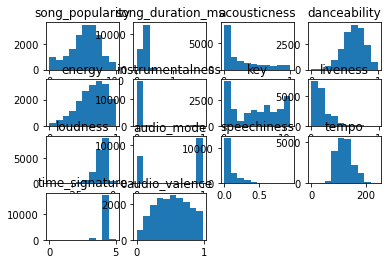

In [5]:
for i,feature in enumerate(df.columns[1:]):
    plt.subplot(4,4,i+1)
    plt.hist(x=df[feature])
    plt.title(feature)
plt.show()

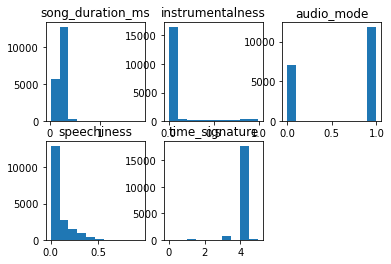

In [6]:
for i,feature in enumerate(df.columns[[2,6,10,11,13]]):
    plt.subplot(2,3,i+1)
    plt.hist(x=df[feature])
    plt.title(feature)
plt.show()

whether or not keep these feature, a large amout of data have the same features, so maybe don't have many information

## Regression

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Follow the professor's recomendation, we treat popularity greater than 60 as popular, less than 40 as unpopular, and leave out the remaining data 

In [8]:
df[df['song_popularity']>60].shape

(7638, 15)

In [9]:
df[df['song_popularity']<40].shape

(4490, 15)

In [10]:
con1=np.where(df['song_popularity']<40)[0]
con2=np.where(df['song_popularity']>60)[0]
index=np.concatenate((con1,con2))
index.shape

(12128,)

In [11]:
df1=df.loc[index]

In [12]:
X=df1[df1.columns[2:]].values #song_popularity
y=df1[df1.columns[1]].values #other features

In [13]:
X.shape

(12128, 13)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

reg=linear_model.LinearRegression()
model=reg.fit(X=X_train,y=y_train)

In [15]:
model.coef_

array([-1.64632965e-05, -6.30299049e+00,  1.98606796e+01, -1.55451625e+01,
       -1.91655840e+01, -1.15857629e-01, -6.82510786e+00,  1.02137866e+00,
        5.07341233e-01, -5.11787686e+00, -9.36104419e-03,  1.44635062e+00,
       -1.24558111e+01])

In [16]:
model.score(X=X_test,y=y_test)

0.07531700919676232